<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data preparation" data-toc-modified-id="Data preparation-1"><span class="toc-item-num">1</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Open-the-data-file-and-review-the-general-information" data-toc-modified-id="Open-the-data-file-and-study-the-general-information-1.1"><span class="toc-item-num">1.1&nbsp;</span>Open the data file and examine the general information</a></span></li><li><span><a href="#Let's-pre-process-data" data-toc-modified-id="Let's-pre-process-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Let's pre-process the data</a></span></li></ul></li><li><span><a href="#Research-tasks" data-toc-modified-id="Research-tasks-2"><span class="toc-item-num">2</span>Problem Investigation</a></span><ul class="toc-item"><li><span><a href="#Splitting-data-into-samples" data-toc-modified-id="Splitting-data-into-samples-2.1"><span class="toc-item-num">2.1</span>Splitting the data into samples</a></span></li><li><span><a href="#Testing-models-without-accounting-balancing-classes" data-toc-modified-id="Testing-models-without-accounting-balancing-classes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Testing models without taking into account class balancing</a></span></li></ul></li><li><span><a href="#Fight-with-imbalance" data-toc-modified-id="Fight-with-imbalance-3"><span class="toc-item-num">3</span>Balancing classes</a></span><ul class="toc-item"><li><span><a href="#ClassWeight-(balancing-classes)" data-toc-modified-id="ClassWeight-(balancing-classes)-3.1"><span class="toc-item-num">3.1</span>ClassWeight (class balancing)</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Study-ROC-curve-and-AUC-ROC-for-the-best-model" data-toc-modified-id="Study-ROC-curve-and-AUC-ROC-for-the-best-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Investigation of the ROC curve and AUC-ROC for the best model</a></span></li></ul></li><li><span><a href="#Testing-models" data-toc-modified-id="Testing-models-4"><span class="toc-item-num">4</span>Testing the model</a></span></li><li><span><a href="#Project readiness Checklist" data-toc-modified-id="Project readiness Checklist-5"><span class="toc-item-num">5</span>Project readiness checklist</a></span></li></ul></div>

# Сustomer churn forecasting

## Project Description
Customers began to leave Beta Bank. Every month. A little, but noticeable. Bank marketers have calculated that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. Historical data on customer behavior and termination of contracts with the bank are provided. 

The project has built a model with an extremely large value of F1-measure (you need to bring the metric to 0.59)

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

### Open the data file and review the general information

In [4]:
df = pd.read_csv(r'datasets/06_сhurn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [7]:
# describe function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Value', 1: 'Types', 2: 'Uniqle'}, axis=1)
describe_colums(df)

,Value,Types,Uniqle
RowNumber,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,10000
CustomerId,"[15634602, 15647311, 15619304, 15701354, 15737...",int64,10000
CreditScore,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",int64,460
Age,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",int64,70
NumOfProducts,"[1, 3, 2, 4]",int64,4
HasCrCard,"[1, 0]",int64,2
IsActiveMember,"[1, 0]",int64,2
Exited,"[1, 0]",int64,2
Tenure,"[2.0, 1.0, 8.0, 7.0, 4.0, 6.0, 3.0, 10.0, 5.0,...",float64,11
Balance,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",float64,6382


Description of columns (data):

In total, there are 14 columns in the table, in which there are 3 data types — `object`, `int64` and `float64`, while the columns "HasCrCard", "IsActiveMember", "Gender" and "Exited" have only 2 variants of values, which means their format can be `bool'.

Signs: 
- RowNumber — index of the row in the data, integer values, `int64`
- CustomerID — unique customer identifier, integer values, `int64`
- Surname — surname, text value, `object`
- CreditScore — credit rating, integer values, `int64`
- Geography — country of residence, categorical value, `object', only 3 regions are considered in the dataset, [France, Spain, Germany] 
- Gender — gender, maybe a boolean value, now `object`, [1, 0]
- Age — age, integer values, `int64`
- Tenure — how many years a person has been a bank customer, integer values, it costs `float64`, but maybe it should be `int64`, since after the comma there are "0"
- Balance — account balance, numeric

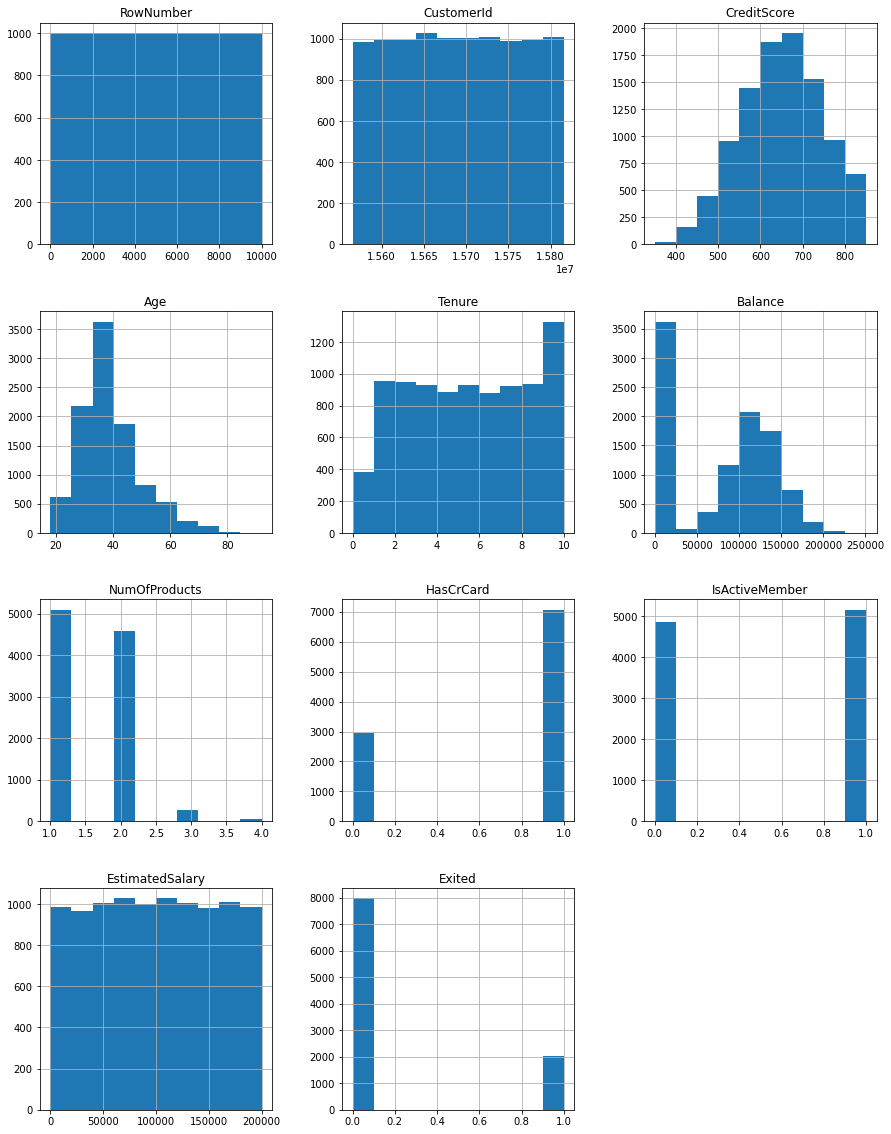

In [8]:
#Let's build a common histogram for all numeric columns of the table
df.hist(figsize=(15, 20));

### Let's pre-process the data

In [9]:
#п#we will reduce the column names to lowercase
df.columns = map(str.lower, df.columns)

In [10]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
df = df.rename(
    columns={'rownumber':'row_number', 
             'creditscore':'credit_score',
             'numofproducts':'num_of_products', 
             'customerid':'customer_id',
             'hascrcard':'has_cr_card', 
             'isactivemember':'is_active_member',
             'estimatedsalary':'estimated_salary'}
)

df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [12]:
# function to reflect missing columns

def empty_values(df):
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'Column name': df.columns,
                                     'Missing': count_missing,
                                     '% missing': percent_missing})
    
    return missing_value_df
empty_values(df).sort_values(by='% missing', ascending=False)

,Column name,Missing,% missing
tenure,tenure,909,9.09
row_number,row_number,0,0.00
customer_id,customer_id,0,0.00
surname,surname,0,0.00
credit_score,credit_score,0,0.00
geography,geography,0,0.00
gender,gender,0,0.00
age,age,0,0.00
balance,balance,0,0.00
num_of_products,num_of_products,0,0.00


Data gaps only in the 'tenure' column, slightly less than 10%

In [13]:
# check for duplicates, everything is OK here
df.duplicated().sum()

0

In [14]:
display(df.loc[df['tenure'].isna()])

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


There are no obvious patterns observed, it is possible that these are just missing data, you can contact the source data provider, they may have a problem. At this stage, it will be enough for us to fill in the gaps with random values so as not to disrupt the distribution.

In [15]:
data = (np.random.randint(0,10,size=df['tenure'].isna().sum()))
df.loc[df['tenure'].isna(),'tenure']=data

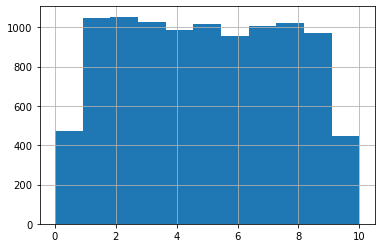

In [16]:
# we confirm that filling in the data did not significantly affect their distribution
df['tenure'].value_counts()
df['tenure'].hist(bins=11)
plt.show()

In [17]:
# now let's bring the column to the correct data type
df['tenure'] = df['tenure'].astype('int')

In [18]:
df

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
# now let's bring the column names to the stylistically correct format
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [20]:
# we will delete the columns "row_number", "customer_id" and "surname", since the sequence number, id number and last name of the client cannot affect "exited"
df.drop(columns=['row_number', 'customer_id','surname'],axis=1,inplace=True)

In [21]:
# to avoid fictitious signs, the OHE method is used
df_ohe=pd.get_dummies(df, drop_first=True)
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Perfect data preprocessing is sufficient to translate the columns "HasCrCard", "IsActiveMember", "Gender" and "Exited" into Boolean values, since this does not affect the solution of the task.

Text(0.5, 1.0, 'Correlation Heatmap')

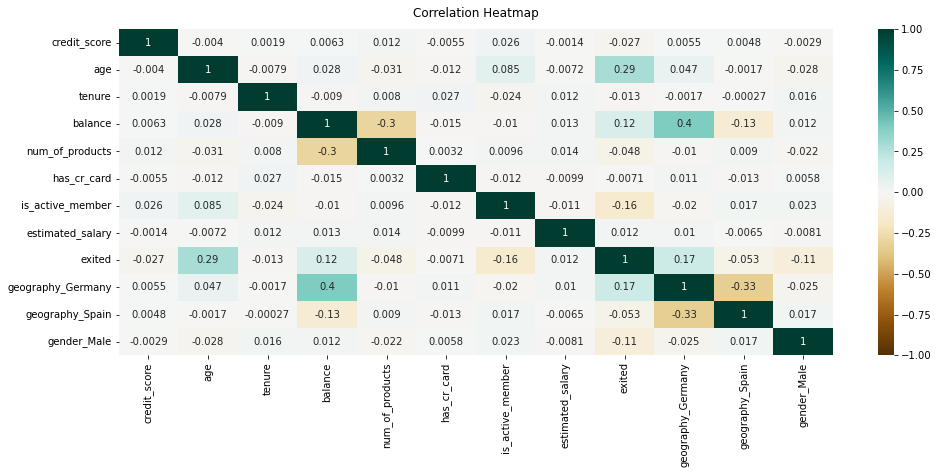

In [22]:
#consider the correlation between features and their effect on the target
plt.figure(figsize=(16, 6))
heatmap= sns.heatmap(df_ohe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

It can be seen from the heat map that the geographical location of the client (see Germany and Spain), age and account balance have the greatest impact. At the same time, there was no excessive perception of individual signs that could "confuse the model""

## Problem Investigation

As part of this analysis, we need to investigate the class balance and train and test the model without taking into account class balancing.

### Splitting data into samples

In [24]:
# to do this, we split the data into samples, where "exited" is the target feature
features = df_ohe.drop('exited', axis=1)
target = df['exited']

The samples should be divided in the ratio: training sample - 0.6, validation sample - 0.2, test sample - 0.2

In [25]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.4, 
                                                                            random_state=12345
                                                                           ) 

In [26]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test, 
                                                                            target_test, 
                                                                            test_size=0.5, 
                                                                            random_state=12345
                                                                           ) 

In [27]:
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


In [28]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)


In [27]:
print(features_test.shape)
print(target_test.shape)

(2000, 11)
(2000,)


Thus we got the desired ratio of samples

In [30]:
# for further work, we create a list of columns with numeric values
numeric = ['credit_score','age','balance','num_of_products','estimated_salary','tenure']

In [31]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [32]:
# scaling the selected features of the training sample
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.047479,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.047479,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.684750,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354587,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.031196,1.140475,-0.891560,0,0,1.524268,1,0,0


In [33]:
# scaling the numerical features of the validation sample
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,-1.031196,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.684750,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.724088,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.740371,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.740371,-1.233163,0.830152,1,0,1.358533,0,1,1


In [34]:
# scaling the numerical features of the test sample
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,-1.031196,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.393925,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.008141,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.740371,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.740371,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Testing models without accounting balancing classes

In [35]:
best_model = None
best_result = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions_valid) 
    if result > best_result:
        best_model = model 
        best_result = result 
        best_depth = depth
print("Accuracy of the best model on the validation sample:", best_result, "Best depth:", best_depth)


Accuracy of the best model on the validation sample: 0.858 Best depth: 6


In [36]:
best_model = None
best_result = 0
best_depth = 0
best_result = 0
for est in range(1, 11):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_depth = depth
            best_result = result
            best_est = est
        

print("Accuracy of the model on the validation sample:", result, "Parameters of the best model:", "Number of trees:", best_est, "Best depth:", best_depth)
    

Accuracy of the model on the validation sample: 0.861 Parameters of the best model: Number of trees: 7 Best depth: 10


In [37]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model.fit(features, target)
predictions_valid = model.predict(features_valid) 
result = accuracy_score(target_valid, predictions_valid) 
print("Accuracy of the model on the validation sample:", result)


Accuracy of the model on the validation sample: 0.676


The best model before class balancing is a random forest with parameters Number of trees: 7 Best depth: 9

AUC-ROC DecisionTreeClassifier 0.8164631712023421
AUC-ROC RandomForestClassifier 0.8442261627520128
AUC-ROC LogisticRegression 0.7585002328830927


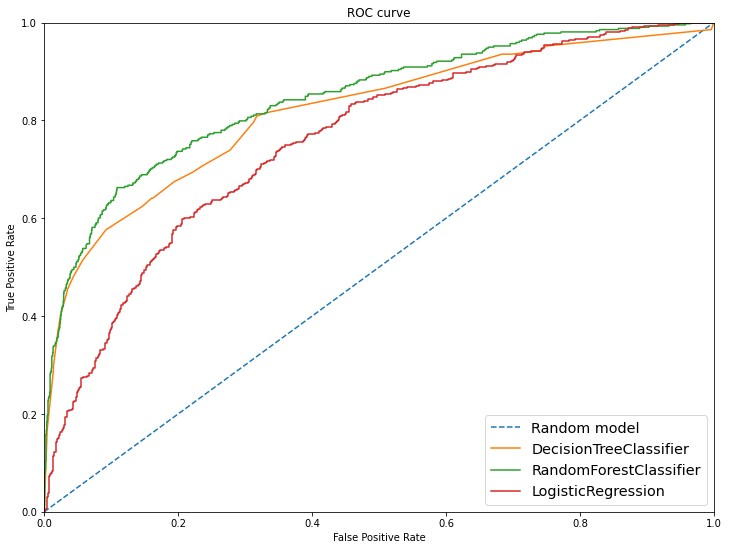

In [38]:

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')

model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC curve")
plt.show()

All three models show results better than the random model. At the same time, the logistic regression of the three shows the worst result. Consider the effect of the imbalance on the models in the next part of the paper.

## Balancing classes

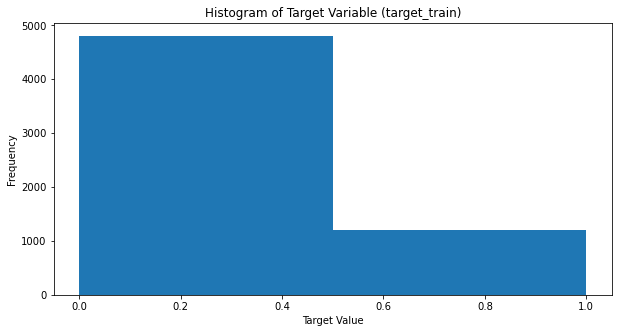

In [41]:
# first, let's check the current balance of classes
target_train.plot(kind='hist', bins=2, figsize=(10, 5))
plt.title("Histogram of Target Variable (target_train)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

In [42]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

The graph shows a clear bias in the values, 0 occurs in 80% of cases

Let's apply the studied methods of normalizing the balance of classes:

- ClassWeight (balancing)
- Upsampling
- Downsampling

### ClassWeight

In [43]:
# Class balancer Crucial tree
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predicted_valid= model.predict(features_valid)
print('Model view: Decision tree without balancing classes')
print('Accuracy (accuaracy):', accuracy_score(target_valid, predicted_valid))
print('Accuracy models:', precision_score(target_valid, predicted_valid))
print('Completeness of the model:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid= model.predict(features_valid)
print('Model view: Decision tree with class balancing')
print('Accuracy (accuaracy):', accuracy_score(target_valid , predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Model view: Decision tree without balancing classes
Accuracy (accuaracy): 0.8475
Accuracy models: 0.6982456140350877
Completeness of the model: 0.47607655502392343
F1: 0.566145092460882

Model view: Decision tree with class balancing
Accuracy (accuaracy): 0.754
Model accuracy: 0.44126984126984126
Model completeness: 0.6650717703349283
F1: 0.5305343511450382


After balancing and accuracy decreased, increased completeness did not compensate for the quality of the model, F1 also decreased.

In [44]:
# Class balancer Random Forest

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Random forest without class balancing')
print('Accuracy(accuaracy):', accuracy_score(target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Random forest with class balancing')
print('Accuracy(accuaracy):', accuracy_score (target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Random forest without class balancing
Accuracy(accuaracy): 0.854
Model accuracy: 0.8181818181818182
Model completeness: 0.3875598086124402
F1: 0.5259740259740261

Random forest with class balancing
Accuracy(accuaracy): 0.8025
Model accuracy: 0.5205724508050089
Model completeness: 0.6961722488038278
F1: 0.5957011258955988


The F1 metric has increased due to a significant increase in completeness.

In [45]:
# Class balancer Logistic regression
model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Logistic regression without class balancing')
print('Accuracy(accuaracy):', accuracy_score( target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Logistic regression with class balancing')
print('Accuracy(accuaracy):', accuracy_score( target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Logistic regression without class balancing
Accuracy(accuaracy): 0.802
Model accuracy: 0.5625
Model completeness: 0.23684210526315788
F1: 0.3333333333333333

Logistic regression with class balancing
Accuracy(accuaracy): 0.7025
Model accuracy: 0.3818424566088118
Model completeness: 0.6842105263157895
F1: 0.4901456726649529


Balancing classes has had a positive effect on logistic regression, however, F-1 still has a low value.

Thus, with the class balancing setup, the best metric indicator F-1 for the Random Forest model is 0.6

### Upsampling

In [47]:
# create a function to increase the rare class
def upsampling(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsampling(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: exited, dtype: int64


In [48]:
# let's apply the method to train the Decision Tree model
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Decision tree')
print('Accuracy (accuaracy):', accuracy_score(target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Decision tree
Accuracy (accuaracy): 0.7525
Model accuracy: 0.43898573692551507
Model completeness: 0.6626794258373205
F1: 0.5281220209723546


In [50]:
# apply the method to train the Random Forest
model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Random forest')
print('Accuracy(accuaracy):', accuracy_score( target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Random forest
Accuracy(accuaracy): 0.786
Model accuracy: 0.49203821656050956
Model completeness: 0.7392344497607656
F1: 0.5908221797323135


In [51]:
# apply the method to train the model Logistic regression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Logistic regression')
print('Accuracy(accuaracy):', accuracy_score( target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Model completeness:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Logistic regression
Accuracy(accuaracy): 0.703
Model accuracy: 0.38235294117647056
Model completeness: 0.6842105263157895
F1: 0.49056603773584906


Again, the Random Forest model shows the highest metric values - 0.6, while accuary reaches almost 80% of cases.

### Downsampling

In [52]:
# let's create a function to reduce the chremer class
def downsampling(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsampling(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: exited, dtype: int64


In [54]:
#similarly, we will train our models on aligned data 
model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Decision tree')
print('Accuracy (accuaracy):', accuracy_score(target_valid, predicted_valid))
print ('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Completeness of the model:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=53)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Random forest')
print('Accuracy(accuaracy):', accuracy_score(target_valid, predicted_valid) )
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Completeness of the model:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Logistic regression')
print('Accuracy(accuaracy):', accuracy_score(target_valid, predicted_valid))
print('Model accuracy:', precision_score(target_valid, predicted_valid))
print('Completeness of the model:', recall_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))
print()

Decision tree
Accuracy (accuaracy): 0.737
Model accuracy: 0.4228571428571429
Completeness of the model: 0.7081339712918661
F1: 0.5295169946332737

Random forest
Accuracy(accuaracy): 0.774
Model accuracy: 0.4744744744744745
Completeness of the model: 0.7559808612440191
F1: 0.5830258302583027

Logistic regression
Accuracy(accuaracy): 0.7025
Model accuracy: 0.3815261044176707
Completeness of the model: 0.6818181818181818
F1: 0.4892703862660944



Random forest shows the best value of the metric F-1 (0.57)

### Study of the ROC curve and AUC-ROC for a better model

The best model is a Random Forest with class balancing settings

AUC-ROC DecisionTreeClassifier 0.7631775536992119
AUC-ROC RandomForestClassifier 0.842558931520273
AUC-ROC LogisticRegression 0.7634331202100182


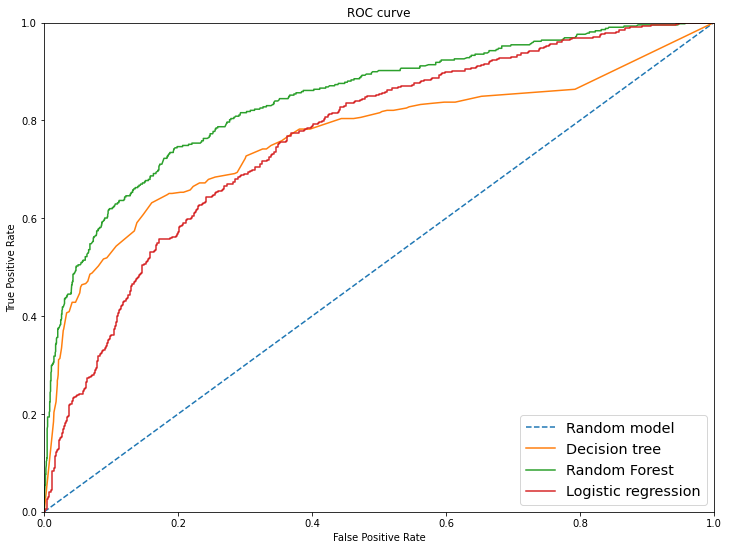

In [55]:

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='Decision tree')

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=7, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='Random Forest')

model = LogisticRegression(random_state=20052020, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='Logistic regression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC curve")
plt.show()

Random forest shows the best result - 0.84

The model will be tested on this model with the class balancing parameter.

## Testing the model

In [48]:
#model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=7, class_weight='balanced')
#model.fit(features_train, target_train)

In [57]:
# let's test the change of the hyperparameter depth
for depth in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Best depth', depth,'F1', f1_score(target_valid, predicted_valid))

Best depth 1 F1 0.5446096654275093
Best depth 2 F1 0.5754189944134078
Best depth 3 F1 0.5865921787709498
Best depth 4 F1 0.6054158607350097
Best depth 5 F1 0.6106719367588933
Best depth 6 F1 0.6182190378710338
Best depth 7 F1 0.6281512605042017
Best depth 8 F1 0.6193548387096774
Best depth 9 F1 0.6290322580645161
Best depth 10 F1 0.6224852071005916
Best depth 11 F1 0.6215538847117794
Best depth 12 F1 0.6082337317397079
Best depth 13 F1 0.6049723756906078
Best depth 14 F1 0.593437945791726
Best depth 15 F1 0.5953079178885631
Best depth 16 F1 0.5871833084947838
Best depth 17 F1 0.5718562874251497
Best depth 18 F1 0.5696969696969697
Best depth 19 F1 0.5918057663125948


Best depth - 9.

In [58]:
# let's test the hyperparameter change - the number of trees
for estimator in range(45, 60, 1):
    model =  RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=estimator, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Best estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

Best estimators 45 F1 0.6223277909738718
Best estimators 46 F1 0.6208530805687204
Best estimators 47 F1 0.6161137440758294
Best estimators 48 F1 0.6183115338882283
Best estimators 49 F1 0.6232227488151659
Best estimators 50 F1 0.6230677764565993
Best estimators 51 F1 0.6232227488151659
Best estimators 52 F1 0.6223277909738718
Best estimators 53 F1 0.6215895610913404
Best estimators 54 F1 0.6183115338882283
Best estimators 55 F1 0.6159334126040428
Best estimators 56 F1 0.6164874551971327
Best estimators 57 F1 0.6142857142857142
Best estimators 58 F1 0.6135552913198573
Best estimators 59 F1 0.6190476190476191


Best estimators - 51

Let's check on a test sample the best model with the best hyperparameters obtained in 4 varants of the model: with an imbalance, with class balancing, upsampling and downsampling settings

In [59]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Random forest - class imbalance')
print('Accuracy(accuaracy):', accuracy_score(target_test, predicted_test))
print('Accuracy:', precision_score(target_test, predicted_test))
print('Completeness:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Random forest - with class balancing')
print('Accuracy(accuaracy):', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Completeness:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Random forest - downsampling')
print('Accuracy(accuaracy):', accuracy_score( target_test, predicted_test))
print('Accuracy:', precision_score(target_test, predicted_test))
print('Completeness:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Random forest - upsampling')
print('Accuracy(accuaracy):', accuracy_score( target_test, predicted_test))
print('Accuracy:', precision_score(target_test, predicted_test))
print('Completeness:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print()


Random forest - class imbalance
Accuracy(accuaracy): 0.843
Accuracy: 0.7511520737327189
Completeness: 0.38534278959810875
F1: 0.5093749999999999

Random forest - with class balancing
Accuracy(accuaracy): 0.8305
Precision: 0.6019417475728155
Completeness: 0.5862884160756501
F1: 0.5940119760479041

Random forest - downsampling
Accuracy(accuaracy): 0.778
Accuracy: 0.4840182648401826
Completeness: 0.75177304964539
F1: 0.5888888888888889

Random forest - upsampling
Accuracy(accuaracy): 0.818
Accuracy: 0.5577299412915852
Completeness: 0.6737588652482269
F1: 0.6102783725910065



Random forest - with class balancing and Random forest - upsampling fulfill the conditions of the task by the value of F1-measure (at least 0.59)

AUC-ROC Random forest - class imbalance 0.8508659498014455
AUC-ROC Random forest - class balancing 0.8546766386186778
AUC-ROC Random forest - downsampling 0.8535358305187903
AUC-ROC Random forest - upsampling 0.8481331072704404


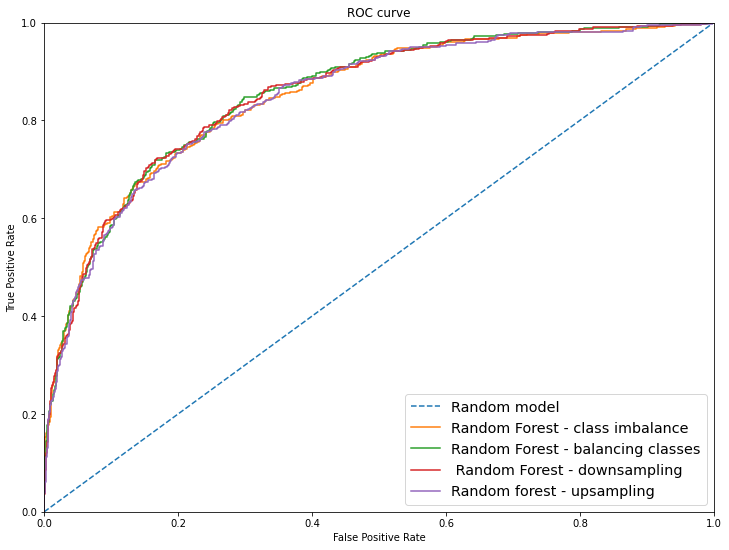

In [60]:
#now let's build the ROC curve
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')


model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Random forest - class imbalance',auc_roc)
plt.plot(fpr, tpr, label='Random Forest - class imbalance')

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Random forest - class balancing',auc_roc)
plt.plot(fpr, tpr, label='Random Forest - balancing classes')

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Random forest - downsampling',auc_roc)
plt.plot(fpr, tpr, label=' Random Forest - downsampling')

model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Random forest - upsampling',auc_roc)
plt.plot(fpr, tpr, label='Random forest - upsampling')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC curve")
plt.show()

AUC-ROC shows very similar values in all 4 variants, showing similar adequacy of the obtained models, while a Random forest with class balancing shows higher values than a Random forest - upsampling.

As a result of the study, 2 models were obtained that perform a Random forest - with class balancing and a Random forest - upsampling fulfill the conditions of the task by the value of F1-measure (at least 0.59), while a Random forest with class balancing is the most preferred model.

In [61]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=51)
model.fit(features_train, target_train)
# model is the trained model
importances = model.feature_importances_

# train_features is the dataframe of training features
feature_list = list(features_train.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,age,0.300238
1,num_of_products,0.199424
2,balance,0.111818
3,credit_score,0.091048
4,estimated_salary,0.089439
5,is_active_member,0.066530
6,tenure,0.049999
7,geography_Germany,0.048819
8,gender_Male,0.021589
9,has_cr_card,0.012761
